In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
import datetime as dt


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data=pd.read_csv('/content/drive/My Drive/dataset.csv')
data

,title,score,id,url,comms_num,body,flair,timestamp,cleanbody,cleantitle
0,Covid 19 - Parliamentary Standing Committee on...,4,fyad3a,https://www.reddit.com/r/india/comments/fyad3a...,0,The Parliamentary Standing Committee on Scienc...,Science & Technology,2020-04-10 14:48:16,parlia stand commit sci technolog environ fore...,covid parlia stand commit sci technolog invit ...
1,[NP]FIITJEE - An institute that is supposed to...,251,7h8luq,https://i.redd.it/cex76h7a2o101.jpg,61,NaN,Science & Technology,2017-12-03 16:19:29,NaN,fiits institut suppos teach sci technolog u hi...
2,What are the websites that cover science & tec...,20,5vouxk,https://www.reddit.com/r/india/comments/5vouxk...,16,"Like verge.com, wired.com etc.",Science & Technology,2017-02-23 14:27:51,lik verg com wir com etc,websit cov sci technolog new focus ind
3,[Science & Technology] The secret to longevity...,2,8o1enm,https://www.mcgill.ca/newsroom/channels/news/s...,2,NaN,Science & Technology,2018-06-02 23:43:55,NaN,sci technolog secret longev microbiom gut
4,[Science & Technology] 20 important discoverie...,30,7hhkem,https://a.msn.com/r/2/BBG3HPi?m=en-in,0,NaN,Science & Technology,2017-12-04 22:16:18,NaN,sci technolog import discovery
...,...,...,...,...,...,...,...,...,...,...
2806,AMA Announcement: Sanjeev Sabhlok from the Swa...,22,9mxnv9,https://www.reddit.com/r/india/comments/9mxnv9...,0,"Hi /r/india, \n\nMr. Sanjeev Sabhlok, a former...",AMA,2018-10-10 16:32:18,ind sanjeev sabhlok form ia off found swarn bh...,am annount sanjeev sabhlok swarn bhar party to...
2807,"[NP] r/India, what's bothering you? I'm here t...",27,4rhdqd,https://www.reddit.com/r/india/comments/4rhdqd...,178,Let's hear it.,AMA,2016-07-06 15:35:35,let hear,ind both talk anyth want answ quest am
2808,"Hi r/India, I am Kumaran Mahalingam, a Geologi...",111,5szty8,https://www.reddit.com/r/india/comments/5szty8...,40,I'm a Geologist passionate about Standup-Paddl...,AMA,2017-02-09 20:58:51,geolog pas standup paddl board sup act work lo...,ind kum mahalingam geolog work promot stand pa...
2809,r/IndiaInvestments is having an AMA with Gaura...,17,8hy5eh,https://www.reddit.com/r/india/comments/8hy5eh...,6,https://np.reddit.com/r/IndiaInvestments/comme...,AMA,2018-05-09 00:40:36,hear nam first tim invest platform websit,indiainvest am gaurav rastog neelabh sany ceo ...


In [3]:
data['flair'].isnull().sum()

0

In [4]:
data.body.fillna('', inplace=True)

Text(0, 0.5, 'Number of posts')

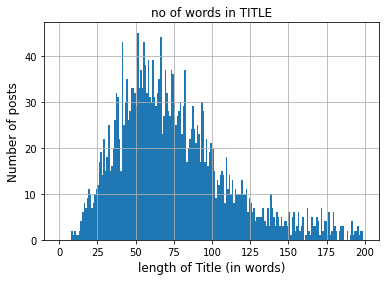

In [5]:
# distribution of no of words in title

temp = data.title.str.len()
temp.hist(bins = np.arange(0,200,1))
plt.title("no of words in TITLE")
plt.xlabel("length of Title (in words)", fontsize=12)
plt.ylabel("Number of posts", fontsize=12)

Text(0, 0.5, 'Number of posts')

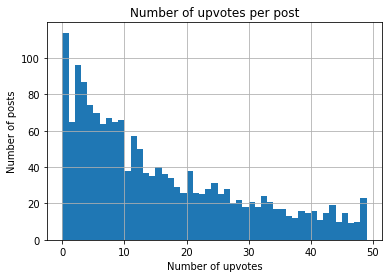

In [6]:
temp = data.score
temp.hist(bins = np.arange(0,50,1))
plt.title("Number of upvotes per post")
plt.xlabel("Number of upvotes")
plt.ylabel("Number of posts")

Text(0, 0.5, 'Number of posts')

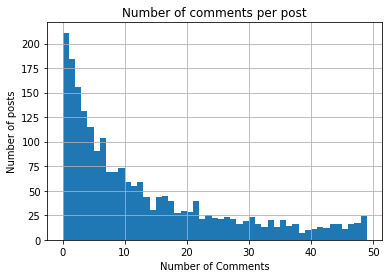

In [7]:
temp = data.comms_num
temp.hist(bins = np.arange(0,50,1))


plt.title("Number of comments per post")
plt.xlabel("Number of Comments")
plt.ylabel("Number of posts")

In [8]:
data = data.sample(frac=1).reset_index(drop=True)

In [9]:
fig = px.histogram(data, x="timestamp")
fig.show()

,comms_num
flair,
AMA,160.250000
AskIndia,208.987854
Finance & Business,24.265455
Non-political,18.158140
Photography,22.768559
Policy & Economy,34.212121
Political,61.129032
Reddiquette,118.281250
Science & Technology,45.901024


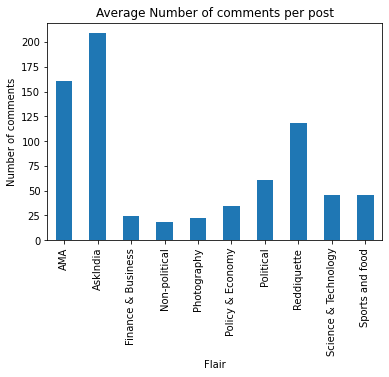

In [10]:
table = data.groupby("flair").mean()[['comms_num']]

table.plot(kind='bar', legend=False, grid=False)
plt.title("Average Number of comments per post")
plt.xlabel("Flair")
plt.ylabel("Number of comments")


table.head(10)

In [11]:
data = data.set_index('timestamp')

Text(0, 0.5, 'Number of comments')

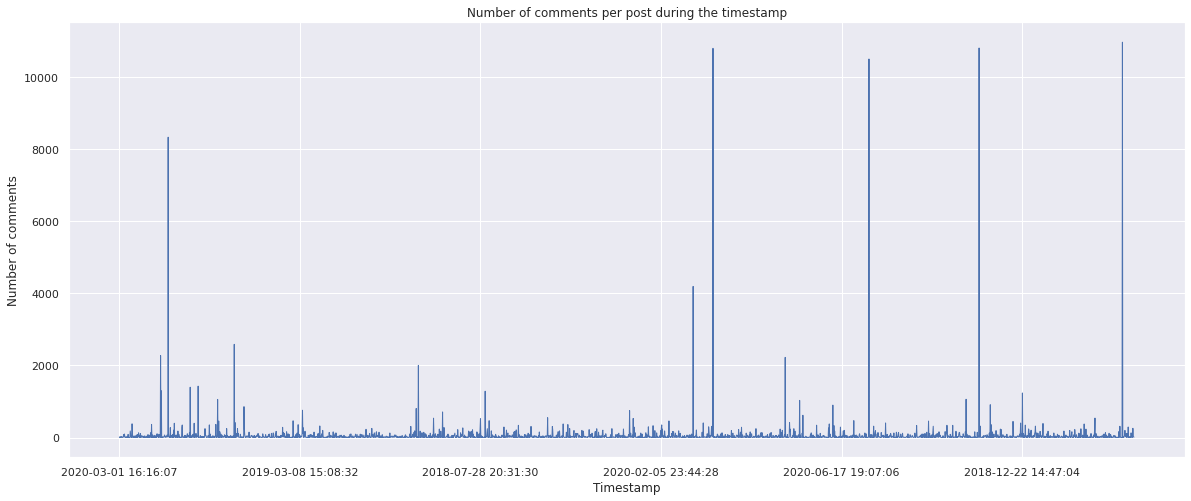

In [12]:
sns.set(rc={'figure.figsize':(20, 8)})

data['comms_num'].plot(linewidth=1);


plt.title("Number of comments per post during the timestamp")
plt.xlabel("Timestamp")
plt.ylabel("Number of comments")


In [13]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [25]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
stop_words.update(['India', 'Political', 'Indian','politics', 'Finance', 'Business', 'photography', 'Photography', 'food', 'Food', 'sport', 'sports'])

In [27]:
def make_wordcloud(col):
    print('Creating wordcloud...')
    contentCorpus = col.values
    wordcloud = WordCloud(width = 3000, height = 2000, max_words=1000,random_state=1, stopwords=stop_words, collocations=False).generate(str(contentCorpus))
    fig = plt.figure(figsize = (10, 8))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

Creating wordcloud...


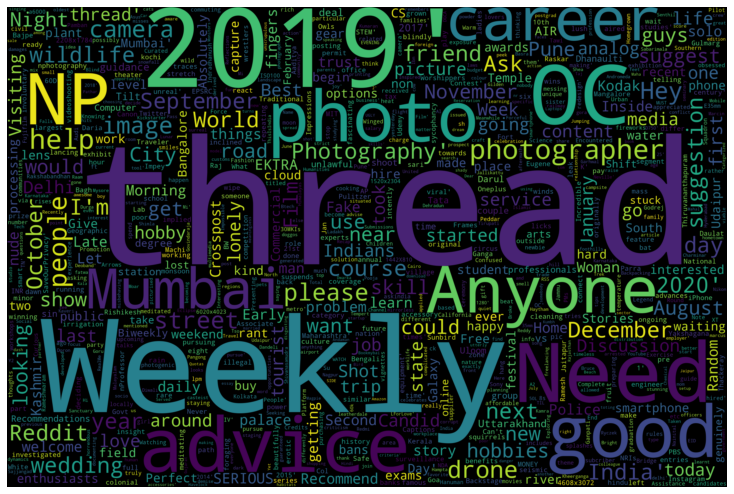

In [28]:
make_wordcloud(data['title'][data.flair == 'Photography'])

Creating wordcloud...


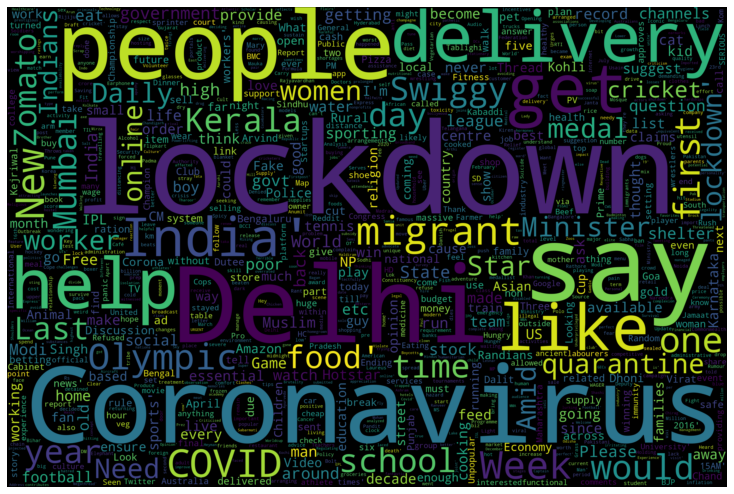

In [29]:
make_wordcloud(data['title'][data.flair == 'Sports and food'])

Creating wordcloud...


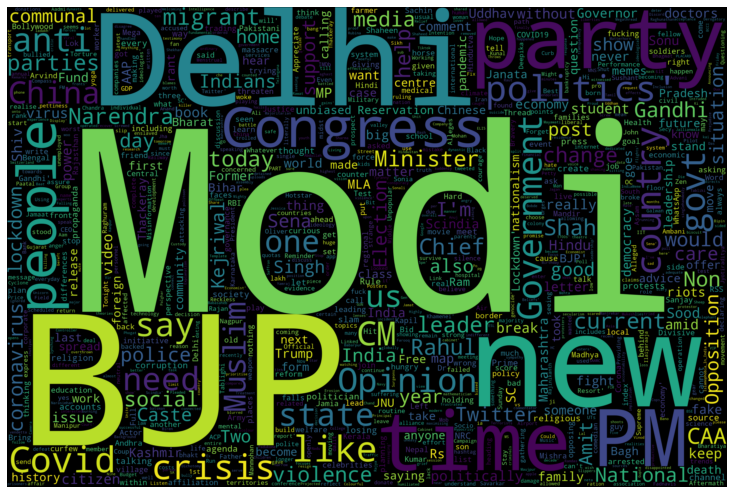

In [30]:
make_wordcloud(data['title'][data.flair == 'Political'])